In [1]:
# TODOs
# try age as protected attribute
# try multiple protected attributes (age, gender, minority)
# try decision trees

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.utils import resample

### Read data

In [5]:
df = pd.read_csv('../../../data/allstate-main.csv')

In [6]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  ...  population perc_nonwhite majority_minority  \
0                    849.04  ...       24233     58.758717              True   
1                    788.73  ...       24233     58.758717              True   
2                   1034.18  ...       24233     58.758717              True   
3                    751.97  ...       24233     58.758717              True   
4                    485.79  ...       24233     58.758717              True   

         age  change_in_premium age_  risk_group  risk_group_0  risk_group_1  \
0  73.107593              -1.40   73           0             1             0   
1  67.355250              -2.20   67           0             1             0   
2  64.570799              -3.99   65           0             1             0   
3  64.242250              -2.58   64           0             1             0   
4  63.804185              -1.36   64           0             1             0   

   perc_change_in_premium  
0               -0.162043  
1               -0.265498  
2               -0.398765  
3               -0.368350  
4               -0.268817  

[5 rows x 28 columns]

In [7]:
df.shape

(92786, 28)

In [8]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  ...  population perc_nonwhite majority_minority  \
0                    849.04  ...       24233     58.758717              True   
1                    788.73  ...       24233     58.758717              True   
2                   1034.18  ...       24233     58.758717              True   
3                    751.97  ...       24233     58.758717              True   
4                    485.79  ...       24233     58.758717              True   

         age  change_in_premium age_  risk_group  risk_group_0  risk_group_1  \
0  73.107593              -1.40   73           0             1             0   
1  67.355250              -2.20   67           0             1             0   
2  64.570799              -3.99   65           0             1             0   
3  64.242250              -2.58   64           0             1             0   
4  63.804185              -1.36   64           0             1             0   

   perc_change_in_premium  
0               -0.162043  
1               -0.265498  
2               -0.398765  
3               -0.368350  
4               -0.268817  

[5 rows x 28 columns]

### Make assumptions

In [9]:
# all policyholders are unique in effect ignoring policyholders w/ same birthdate and gender

In [10]:
pd.set_option('min_rows', 100)
pd.set_option('display.max_columns', 50)

### Features engineering

#### Convert premium to int

In [11]:
df['current_premium_int'] = df['current_premium'].round().astype(int)

<AxesSubplot:>

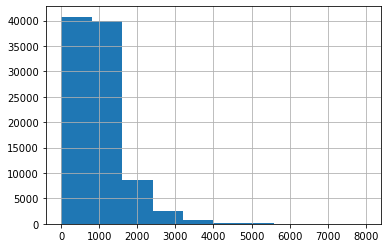

In [12]:
df['current_premium_int'].hist()

#### Convert age into categorical variables

In [13]:
df['age_'].describe()

count    92786.000000
mean        55.386093
std         15.033386
min         24.000000
25%         43.000000
50%         55.000000
75%         66.000000
max        121.000000
Name: age_, dtype: float64

<AxesSubplot:>

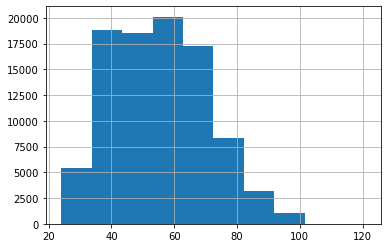

In [14]:
df['age_'].hist()

In [15]:
df['age_group'] = pd.cut(df['age_'], bins=[20,40,60,80,100,150], labels=['young', 'middle-aged', 'senior',
                                                                        'retired', 'old'])

In [16]:
df = pd.concat([df, pd.get_dummies(df['age_group'], drop_first=False)], axis=1)

#### Add male, female

In [17]:
df = pd.concat([df, pd.get_dummies(df['gender'], drop_first=False)], axis=1)
df.rename(columns={'F':'Female', 'M':'Male'}, inplace=True)

#### Add ypc dummies

In [18]:
df = pd.concat([df, pd.get_dummies(df['ypc'], prefix='ypc')], axis=1)

#### Add minority

In [19]:
df['majority_minority'] = df['majority_minority'] * 1

In [20]:
df.rename(columns={'majority_minority':'minority'}, inplace=True)

In [21]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  cgr_factor  cgr   county  county_code  zipcode  \
0                    849.04        1.02  ZHK  CHARLES            8    20601   
1                    788.73        1.06  6NS  CHARLES            8    20601   
2                   1034.18        0.96  Z2D  CHARLES            8    20601   
3                    751.97        0.91  D7G  CHARLES            8    20601   
4                    485.79        1.06  3YN  CHARLES            8    20601   

      town  area  GEO.id2  population  perc_nonwhite  minority        age  \
0  WALDORF   210    20601       24233      58.758717         1  73.107593   
1  WALDORF   210    20601       24233      58.758717         1  67.355250   
2  WALDORF   210    20601       24233      58.758717         1  64.570799   
3  WALDORF   210    20601       24233      58.758717         1  64.242250   
4  WALDORF   210    20601       24233      58.758717         1  63.804185   

   change_in_premium  age_  risk_group  risk_group_0  risk_group_1  \
0              -1.40    73           0             1             0   
1              -2.20    67           0             1             0   
2              -3.99    65           0             1             0   
3              -2.58    64           0             1             0   
4              -1.36    64           0             1             0   

   perc_change_in_premium  current_premium_int age_group  young  middle-aged  \
0               -0.162043                  864    senior      0            0   
1               -0.265498                  829    senior      0            0   
2               -0.398765                 1001    senior      0            0   
3               -0.368350                  700    senior      0            0   
4               -0.268817                  506    senior      0            0   

   senior  retired  old  Female  Male  ypc_0  ypc_1  ypc_2  ypc_3  ypc_4  \
0       1        0    0       0     1      1      0      0      0      0   
1       1        0    0       1     0      1      0      0      0      0   
2       1        0    0       0     1      1      0      0      0      0   
3       1        0    0       1     0      1      0      0      0      0   
4       1        0    0       1     0      1      0      0      0      0   

   ypc_5  
0      0  
1      0  
2      0  
3      0  
4      0

### Create modelling dataset

In [22]:
df.shape

(92786, 43)

In [23]:
# TODO
dataset = df[['current_premium', 'risk_group', 'young', 'middle-aged', 'senior', 'retired', 'old', 'Female', 'Male', 'ypc_0', 'ypc_1', 'ypc_2', 'ypc_3', 'ypc_4', 'ypc_5', 'minority']].copy()

#### Upsample

In [24]:
dataset.shape

(92786, 16)

In [25]:
sns.reset_orig()

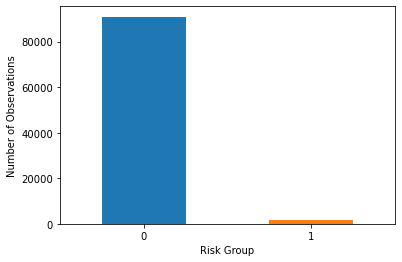

In [26]:
dataset['risk_group'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])
plt.xticks(rotation=0)
plt.xlabel('Risk Group')
plt.ylabel('Number of Observations')
plt.show()

In [27]:
dataset_riskgrp0 = dataset[dataset['risk_group'] == 0].copy()

In [28]:
dataset_riskgrp1 = dataset[dataset['risk_group'] == 1].copy()

In [29]:
dataset_riskgrp1_rs = resample(dataset_riskgrp1, replace=True, n_samples=90951, random_state=786)

In [30]:
dataset = dataset_riskgrp0.append(dataset_riskgrp1_rs)

In [31]:
dataset['risk_group'].value_counts()

1    90951
0    90951
Name: risk_group, dtype: int64

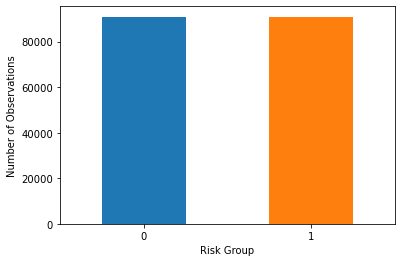

In [32]:
dataset['risk_group'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])
plt.xticks(ticks=[0,1], labels=('0', '1'), rotation=0)
plt.xlabel('Risk Group')
plt.ylabel('Number of Observations')
plt.show()

In [33]:
dataset.groupby(['Male', 'risk_group'])['risk_group'].count()

Male  risk_group
0     0             38883
      1             33092
1     0             52068
      1             57859
Name: risk_group, dtype: int64

## Modeling

### 1) Sample customers with same current premium but different risk groups

In [34]:
df_counts = df.groupby('current_premium_int')[['risk_group_0', 'risk_group_1']].sum().reset_index()

In [35]:
df_counts.head()

current_premium_int  risk_group_0  risk_group_1
0                    3             1             0
1                    5             1             0
2                    6             3             0
3                    7             5             0
4                    8             4             0

In [36]:
# potential sample, but only 189 obs
df_counts[df_counts['risk_group_0'] == df_counts['risk_group_1']].head()

current_premium_int  risk_group_0  risk_group_1
1868                 1994             3             3
1869                 1995             5             5
1967                 2093             3             3
1979                 2105             2             2
1994                 2120             2             2

In [37]:
# TODO: play with filters
# 1120 obs
df_counts[(df_counts['risk_group_0'] <= 20) & (df_counts['risk_group_1'] > 0)].head()

current_premium_int  risk_group_0  risk_group_1
1758                 1884             9             1
1759                 1885            13             1
1770                 1896            16             2
1773                 1899            11             1
1777                 1903            11             1

<AxesSubplot:>

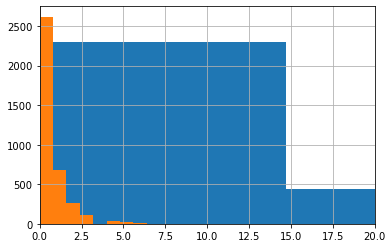

In [38]:
axes = plt.gca()
axes.set_xlim([0,20])

df_counts['risk_group_0'].hist()
df_counts['risk_group_1'].hist()

In [39]:
pd.set_option('display.max_rows', 100)

### Filter to count of riskgroup 0 <=20 and count of riskgroup 1 > 0

In [40]:
# TODO: play with criteria
df_new = df_counts[(df_counts['risk_group_0'] <= 20) & (df_counts['risk_group_1'] > 0)].copy()

In [41]:
df_new.sum()

current_premium_int    3151179
risk_group_0              3757
risk_group_1              1835
dtype: int64

In [42]:
# total policyholders in sample
3757+1835

5592

In [43]:
df_new = df_new.merge(df, on=['current_premium_int'], suffixes=['_agg', ''], how='left')

In [44]:
# check
len(df_new)

5592

In [45]:
df_new['risk_group'].value_counts()

0    3757
1    1835
Name: risk_group, dtype: int64

In [46]:
df_new[df_new['current_premium_int'] == 1884]

current_premium_int  risk_group_0_agg  risk_group_1_agg  territory gender  \
0                 1884                 9                 1        639      F   
1                 1884                 9                 1        779      F   
2                 1884                 9                 1        783      M   
3                 1884                 9                 1       1009      M   
4                 1884                 9                 1       1093      F   
5                 1884                 9                 1       1136      F   
6                 1884                 9                 1       1144      M   
7                 1884                 9                 1       1215      F   
8                 1884                 9                 1       1225      M   
9                 1884                 9                 1       1853      M   

    birthdate  ypc  current_premium  indicated_premium  selected_premium  \
0    9/3/1942    5          1883.96            2356.36           1972.17   
1   6/29/1992    4          1883.84            1129.15           1877.92   
2   9/25/1973    0          1883.90            1291.47           1878.85   
3  12/29/1957    5          1884.34            1257.22           1883.74   
4   7/19/1964    5          1884.45            2020.36           1977.46   
5    4/3/1974    5          1884.10            1986.86           1969.57   
6   2/15/1968    5          1884.31            3031.78           1976.94   
7  11/15/1971    2          1883.81            2023.12           1973.73   
8   8/20/1960    5          1883.93            2292.20           2259.76   
9  12/10/1942    5          1884.30            2108.15           1973.16   

   underlying_premium  fixed_expenses  underlying_total_premium  cgr_factor  \
0             1663.59          188.58                   1852.17        1.07   
1             1816.88          183.28                   2000.16        0.93   
2             1705.62          147.58                   1853.20        1.02   
3             1651.26          232.48                   1883.74        1.00   
4             1727.70          152.57                   1880.27        1.06   
5             1672.18           94.67                   1766.85        1.12   
6             1595.27          188.27                   1783.54        1.12   
7             1793.25          180.48                   1973.73        1.00   
8             1930.99           94.67                   2025.66        1.12   
9             1668.76          219.28                   1888.04        1.05   

   cgr          county  county_code  zipcode             town  area  GEO.id2  \
0  FKQ         CALVERT            4    20639      HUNTINGTOWN   230    20639   
1  QHK    ANNE ARUNDEL            2    20779   TRACYS LANDING   240    20779   
2  YNG  PRINCE GEORGES           16    20783          ADELPHI   200    20783   
3  FSI         HARFORD           12    21009         ABINGDON   280    21009   
4  3YN       BALTIMORE            3    21093  LTHRVL TIMONIUM   260    21093   
5  I85       BALTIMORE            3    21136     REISTERSTOWN   260    21136   
6  I85    ANNE ARUNDEL            2    21144           SEVERN   240    21144   
7  FSI       BALTIMORE            3    21215        BALTIMORE   260    21215   
8  I85    ANNE ARUNDEL            2    21225            BALTO   240    21225   
9  JDN        SOMERSET           19    21853    PRINCESS ANNE   360    21853   

   population  perc_nonwhite  minority        age  change_in_premium  age_  \
0       14546      16.066273         1  78.194624              88.21    78   
1        1148       5.052265         1  28.372930              -5.92    28   
2       47911      92.943165         1  47.133069              -5.05    47   
3       28966      21.180004         1  62.873297              -0.60    63   
4       36812      17.225361         1  56.318747              93.01    56   
5       32741      36.941450         1  46.612867              85.

### Resampling

In [47]:
riskgrp0 = df_new[df_new['risk_group'] == 0].copy()
riskgrp1 = df_new[df_new['risk_group'] == 1].copy()

#### upsample

In [48]:
riskgrp1_upsample = resample(riskgrp1, replace=True, n_samples=3757, random_state=786)

In [49]:
df_new_upsample = riskgrp0.append(riskgrp1_upsample)

In [50]:
df_new_upsample['risk_group'].value_counts()

1    3757
0    3757
Name: risk_group, dtype: int64

#### downsample

In [51]:
riskgrp0_downsample = resample(riskgrp0, replace=False, n_samples=1835, random_state=786)

In [52]:
df_new_downsample = riskgrp1.append(riskgrp0_downsample)

In [53]:
df_new_downsample['risk_group'].value_counts()

1    1835
0    1835
Name: risk_group, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import scale

In [55]:
def confusion_matrix(y_test, y_pred):
    cm = sk_confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(data=cm, columns=[-1, 1], index=[-1, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    error_rate = (y_pred != y_test).mean()
#     print('error rate: %.2f' % error_rate)
    return cm

In [56]:
def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = roc_curve(labels, prediction_scores, pos_label=1)
    auc = roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()

In [57]:
def plot_pr_curve(labels, prediction_scores):
    pr, rc, _ = precision_recall_curve(labels, prediction_scores, pos_label=1)
   
    plt.plot(rc, pr, label='Logistic model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid('on')
    plt.axis('square')
#     plt.legend()
    plt.tight_layout()

In [58]:
def logreg(X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    logreg = LogisticRegression().fit(X_train, y_train)
    print("Coefficients: %s" % logreg.coef_)
    y_preds = logreg.predict_proba(X_test)[:,1]
    
    thresh = np.mean(y_test)
    
    # plot accuracy metrics    
    plot_roc(y_test, y_preds)
    plt.show()
    plot_pr_curve(y_test, y_preds)
    plt.show()
    
    print("The accuracy score of the model is %s" % (logreg.score(X_test, y_test)))
    
    # tn, fp, fn, tp
    print(confusion_matrix(y_test, np.where(y_preds > thresh, 1, 0).ravel()))
    
    print("Precision: %s" % (precision_score(y_test, np.where(y_preds > thresh, 1, 0))))
    print("Recall: %s" % (recall_score(y_test, np.where(y_preds > thresh, 1, 0))))

### 1.1 Baseline

In [59]:
df_new['risk_group'].value_counts()

0    3757
1    1835
Name: risk_group, dtype: int64

In [60]:
len(df_new)

5592

In [61]:
y = df_new['risk_group'].values

In [62]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
df_new['current_premium_int_scaled'] = scale(df_new['current_premium_int'])

In [64]:
X = df_new[['ypc', 'Female', 'age_', 'minority', 'current_premium_int_scaled']].values
# X2 = df_new[['ypc', 'Female', 'age_', 'minority']].values

In [65]:
X

array([[ 5.        ,  1.        , 78.        ,  1.        , -1.01943263],
       [ 4.        ,  1.        , 28.        ,  1.        , -1.01943263],
       [ 0.        ,  0.        , 47.        ,  1.        , -1.01943263],
       ...,
       [ 1.        ,  1.        , 52.        ,  1.        ,  9.24519109],
       [ 5.        ,  1.        , 56.        ,  1.        ,  9.53266819],
       [ 5.        ,  0.        , 60.        ,  1.        ,  9.69049876]])

Coefficients: [[ 0.0103766   0.0184161  -0.00483544 -0.24566102  0.60802148]]


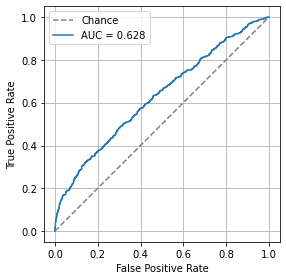

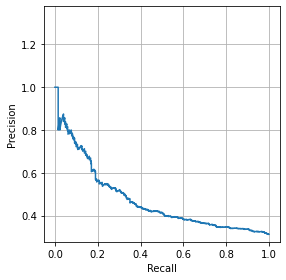

The accuracy score of the model is 0.7079856972586412
Predicted label   -1    1
True label               
-1               709  447
 1               231  291
Precision: 0.3943089430894309
Recall: 0.5574712643678161


In [66]:
logreg(X, y)

### 1.2 Upsample

In [67]:
df_new_upsample['risk_group'].value_counts()

1    3757
0    3757
Name: risk_group, dtype: int64

In [68]:
y = df_new_upsample['risk_group'].values

In [69]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
df_new_upsample['current_premium_int_scaled'] = scale(df_new_upsample['current_premium_int'])

In [71]:
X = df_new_upsample[['ypc', 'Female', 'age_', 'minority', 'current_premium_int_scaled']].values

Coefficients: [[ 0.03851638  0.01501828 -0.00828166  0.19946147  0.61906146]]


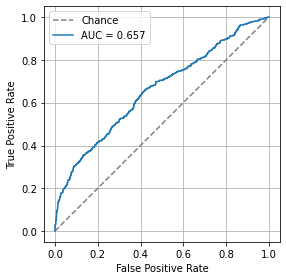

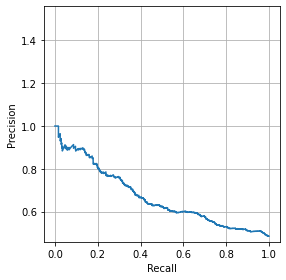

The accuracy score of the model is 0.6124168514412417
Predicted label   -1    1
True label               
-1               763  401
 1               489  602
Precision: 0.6001994017946162
Recall: 0.5517873510540788


In [72]:
logreg(X, y)

### 1.3 Downsample

In [73]:
df_new_downsample['risk_group'].value_counts()

1    1835
0    1835
Name: risk_group, dtype: int64

In [74]:
y = df_new_downsample['risk_group'].values

In [75]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
df_new_downsample['current_premium_int_scaled'] = scale(df_new_downsample['current_premium_int'])

In [77]:
X = df_new_downsample[['ypc', 'Female', 'age_', 'minority', 'current_premium_int_scaled']].values

Coefficients: [[ 0.05283059  0.08755258 -0.00891158  0.41421617  0.70181228]]


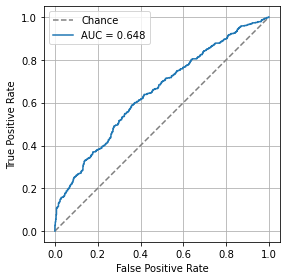

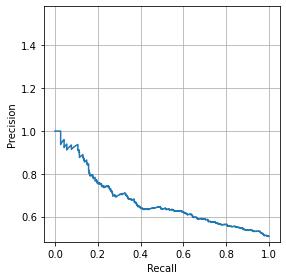

The accuracy score of the model is 0.5930971843778383
Predicted label   -1    1
True label               
-1               407  135
 1               321  238
Precision: 0.6380697050938338
Recall: 0.4257602862254025


In [78]:
logreg(X, y)

### 2) Use all customers

In [79]:
df['risk_group'].value_counts()

0    90951
1     1835
Name: risk_group, dtype: int64

In [80]:
len(df)

92786

#### Upsample

In [81]:
df_majority = df[df['risk_group'] == 0].copy()

In [82]:
df_minority = df[df['risk_group'] == 1].copy()

In [83]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=90951, random_state=786)

In [84]:
df_upsampled = df_majority.append(df_minority_upsampled)

In [85]:
df_upsampled['risk_group'].value_counts()

1    90951
0    90951
Name: risk_group, dtype: int64

#### Downsample

In [86]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=1835, random_state=786)

In [87]:
df_downsampled = df_minority.append(df_majority_downsampled)

In [88]:
df_downsampled['risk_group'].value_counts()

1    1835
0    1835
Name: risk_group, dtype: int64

### Modelling

### 2.1 Baseline

In [89]:
y = df['risk_group'].values

In [90]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
# scale because it looks very different from other features
df['current_premium_scaled'] = scale(df['current_premium'])

In [92]:
X = df[['ypc', 'Female', 'age_', 'minority', 'current_premium_scaled']].values

In [93]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  7.30000000e+01,
         1.00000000e+00, -2.76566751e-01],
       [ 0.00000000e+00,  1.00000000e+00,  6.70000000e+01,
         1.00000000e+00, -3.35534614e-01],
       [ 0.00000000e+00,  0.00000000e+00,  6.50000000e+01,
         1.00000000e+00, -4.86044020e-02],
       ...,
       [ 5.00000000e+00,  1.00000000e+00,  3.10000000e+01,
         1.00000000e+00, -3.04215237e-01],
       [ 5.00000000e+00,  0.00000000e+00,  3.00000000e+01,
         1.00000000e+00,  2.57948393e-01],
       [ 5.00000000e+00,  1.00000000e+00,  2.90000000e+01,
         1.00000000e+00, -5.38437650e-02]])

Coefficients: [[ 0.01684123 -0.19540207  0.00199362  0.01118163  1.15792378]]


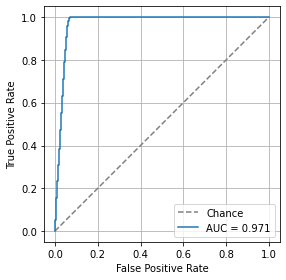

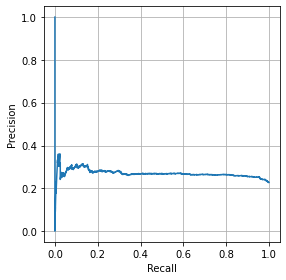

The accuracy score of the model is 0.9776548354648656
Predicted label     -1     1
True label                  
-1               24056  3222
 1                   0   558
Precision: 0.14761904761904762
Recall: 1.0


In [94]:
logreg(X, y)

### 2.2 Fix unequal classes by upsampling

In [95]:
y = df_upsampled['risk_group'].values

In [96]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [97]:
df_upsampled['current_premium_scaled'] = scale(df_upsampled['current_premium'])

In [98]:
X = df_upsampled[['ypc', 'Female', 'age_', 'minority', 'current_premium_scaled']].values

Coefficients: [[ 3.56146347e-02  3.17478471e-02 -4.13010406e-03  2.64611849e-02
   4.96054580e+00]]


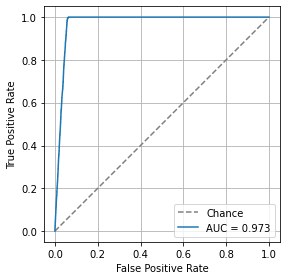

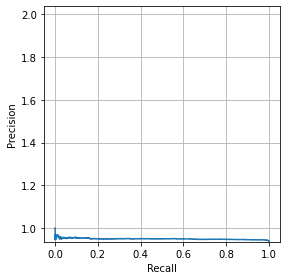

The accuracy score of the model is 0.9633504975169962
Predicted label     -1      1
True label                   
-1               25308   2000
 1                   0  27263
Precision: 0.9316543074872706
Recall: 1.0


In [99]:
logreg(X, y)

### 2.3 Fix unequal classes by downsampling

In [100]:
y = df_downsampled['risk_group'].values

In [101]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [102]:
df_downsampled['current_premium_scaled'] = scale(df_downsampled['current_premium'])

In [103]:
X = df_downsampled[['ypc', 'Female', 'age_', 'minority', 'current_premium_scaled']].values

Coefficients: [[ 0.04863827 -0.10015275 -0.00612631 -0.16607823  4.89955426]]


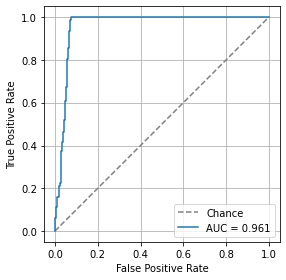

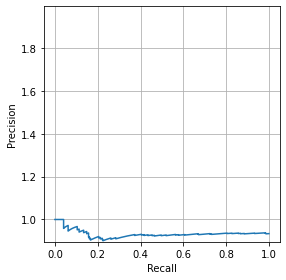

The accuracy score of the model is 0.9618528610354223
Predicted label   -1    1
True label               
-1               495   40
 1                 0  566
Precision: 0.933993399339934
Recall: 1.0


In [104]:
logreg(X, y)